IMPORT OF ALL THE NECESSARY MODULES 

In [92]:
import os, shutil, sys
from keras import layers, models, optimizers
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing import image
from PIL import Image
from keras.callbacks import callbacks, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
import pandas

REORGANIZATION OF DATA TO OBTAIN 3 CATEGORIES 

In [2]:
original_dataset_dir = '/Users/Qboszka/Desktop/chest_xray'

In [3]:
base_dir = '/Users/Qboszka/Desktop/chest_xray_final'
os.mkdir(base_dir)

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
train_normal_dir = os.path.join(train_dir, 'normal')
os.mkdir(train_normal_dir)

train_bacteria_dir = os.path.join(train_dir, 'bacteria')
os.mkdir(train_bacteria_dir)

train_virus_dir = os.path.join(train_dir, 'virus')
os.mkdir(train_virus_dir)

validation_normal_dir = os.path.join(validation_dir, 'normal')
os.mkdir(validation_normal_dir)

validation_bacteria_dir = os.path.join(validation_dir, 'bacteria')
os.mkdir(validation_bacteria_dir)

validation_virus_dir = os.path.join(validation_dir, 'virus')
os.mkdir(validation_virus_dir)

test_normal_dir = os.path.join(test_dir, 'normal')
os.mkdir(test_normal_dir)

test_bacteria_dir = os.path.join(test_dir, 'bacteria')
os.mkdir(test_bacteria_dir)

test_virus_dir = os.path.join(test_dir, 'virus')
os.mkdir(test_virus_dir)

In [6]:
train_normal_images = os.listdir('/Users/Qboszka/Desktop/chest_xray/train/NORMAL')
for train_normal_image in train_normal_images:
    src = '/Users/Qboszka/Desktop/chest_xray/train/NORMAL/' + train_normal_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/train/normal/' + train_normal_image
    shutil.copyfile(src,dst)

In [7]:
train_backteria_images = os.listdir('/Users/Qboszka/Desktop/chest_xray/train/PNEUMONIA')
for train_backteria_image in train_backteria_images:
    src = '/Users/Qboszka/Desktop/chest_xray/train/PNEUMONIA/' + train_backteria_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/train/bacteria/' + train_backteria_image
    if ("bacteria") in train_backteria_image:
        shutil.copyfile(src,dst)

In [8]:
train_virus_images = os.listdir('/Users/Qboszka/Desktop/chest_xray/train/PNEUMONIA')
for train_virus_image in train_virus_images:
    src = '/Users/Qboszka/Desktop/chest_xray/train/PNEUMONIA/' + train_virus_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/train/virus/' + train_virus_image
    if ("virus") in train_virus_image:
        shutil.copyfile(src,dst)

In [9]:
test_normal_images = os.listdir('/Users/Qboszka/Desktop/chest_xray/test/NORMAL')
for test_normal_image in test_normal_images:
    src = '/Users/Qboszka/Desktop/chest_xray/test/NORMAL/' + test_normal_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/test/normal/' + test_normal_image
    shutil.copyfile(src,dst)

In [10]:
test_bacteria_images = os.listdir('/Users/Qboszka/Desktop/chest_xray/test/PNEUMONIA')
for test_bacteria_image in test_bacteria_images:
    src = '/Users/Qboszka/Desktop/chest_xray/test/PNEUMONIA/' + test_bacteria_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/test/bacteria/' + test_bacteria_image
    if ("bacteria") in test_bacteria_image:
        shutil.copyfile(src,dst)

In [11]:
test_virus_images = os.listdir('/Users/Qboszka/Desktop/chest_xray/test/PNEUMONIA')
for test_virus_image in test_virus_images:
    src = '/Users/Qboszka/Desktop/chest_xray/test/PNEUMONIA/' + test_virus_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/test/virus/' + test_virus_image
    if ("virus") in test_virus_image:
        shutil.copyfile(src,dst)

In [12]:
validation_normal_images = os.listdir('/Users/Qboszka/Desktop/chest_xray_final/test/normal')
for validation_normal_image in validation_normal_images:
    src = '/Users/Qboszka/Desktop/chest_xray_final/test/normal/' + validation_normal_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/validation/normal/' + validation_normal_image
    if len(os.listdir(validation_normal_dir)) <= 29:
        shutil.move(src,dst)

In [13]:
validation_bacteria_images = os.listdir('/Users/Qboszka/Desktop/chest_xray_final/test/bacteria')
for valdiation_bacteria_image in validation_bacteria_images:
    src = '/Users/Qboszka/Desktop/chest_xray_final/test/bacteria/' + valdiation_bacteria_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/validation/bacteria/' + valdiation_bacteria_image
    if len(os.listdir(validation_bacteria_dir)) <= 29:
        shutil.move(src,dst)

In [14]:
validation_virus_images = os.listdir('/Users/Qboszka/Desktop/chest_xray_final/test/virus')
for validation_virus_image in validation_virus_images:
    src = '/Users/Qboszka/Desktop/chest_xray_final/test/virus/' + validation_virus_image
    dst = '/Users/Qboszka/Desktop/chest_xray_final/validation/virus/' + validation_virus_image
    if len(os.listdir(validation_virus_dir)) <= 29:
        shutil.move(src,dst)

In [15]:
print(os.listdir('/Users/Qboszka/Desktop/chest_xray/train'))
print(os.listdir('/Users/Qboszka/Desktop/chest_xray_final/train'))

['.DS_Store', 'PNEUMONIA', 'NORMAL']
['normal', 'bacteria', 'virus']


DATA BALANCE BAR PLOTS

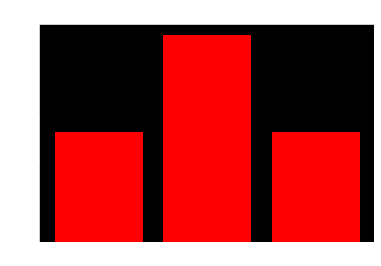

In [17]:
normal_count = (len(os.listdir(train_normal_dir)))
bacteria_count = (len(os.listdir(train_bacteria_dir)))
virus_count = (len(os.listdir(train_virus_dir)))

plt.figure()
plt.style.use('dark_background')
bars = ('NORMAL', 'BACTERIA', 'VIRUS')
height = [normal_count, bacteria_count, virus_count]
plt.bar(np.arange(len(bars)), height, color='r', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Train data balance', x = 0.3, y = 1,fontsize = 16)
plt.show()

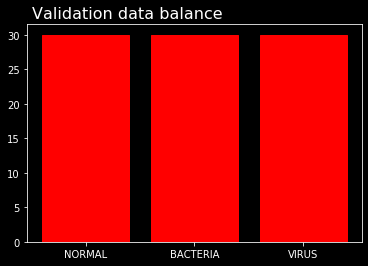

In [18]:
normal_count = (len(os.listdir(validation_normal_dir)))
bacteria_count = (len(os.listdir(validation_bacteria_dir)))
virus_count = (len(os.listdir(validation_virus_dir)))

plt.figure()
plt.style.use('dark_background')
bars = ('NORMAL', 'BACTERIA', 'VIRUS')
height = [normal_count, bacteria_count, virus_count]
plt.bar(np.arange(len(bars)), height, color='r', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Validation data balance', x = 0.3, y = 1,fontsize = 16)
plt.show()

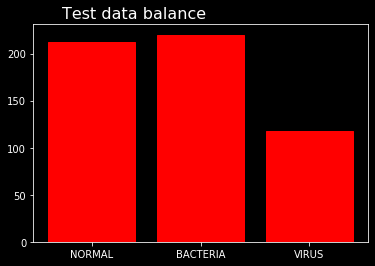

In [19]:
normal_count = (len(os.listdir(test_normal_dir)))
bacteria_count = (len(os.listdir(test_bacteria_dir)))
virus_count = (len(os.listdir(test_virus_dir)))

plt.figure()
plt.style.use('dark_background')
bars = ('NORMAL', 'BACTERIA', 'VIRUS')
height = [normal_count, bacteria_count, virus_count]
plt.bar(np.arange(len(bars)), height, color='r', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Test data balance', x = 0.3, y = 1,fontsize = 16)
plt.show()

EXAMPLE IMAGES OF EACH CATEGORY 

NORMAL


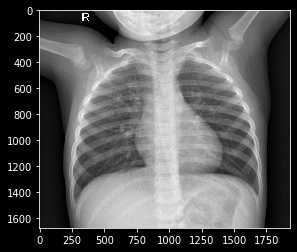

In [66]:
img_normal = 'IM-0243-0001.jpeg'
img_normal = load_img('/Users/Qboszka/Desktop/chest_xray_final/train/normal/' + img_normal)

print('NORMAL')
plt.imshow(img_normal)
plt.show()

BACTERIA


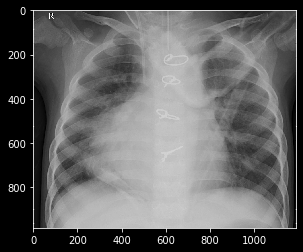

In [67]:
img_bacteria='person55_bacteria_262.jpeg'
img_bacteria=load_img('/Users/Qboszka/Desktop/chest_xray_final/train/bacteria/' + img_bacteria)

print('BACTERIA')
plt.imshow(img_bacteria)
plt.show()

VIRUS


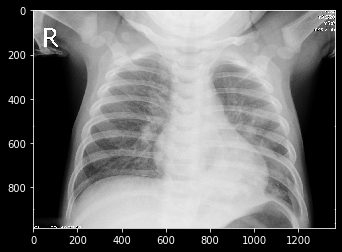

In [68]:
img_virus = 'person151_virus_301.jpeg'
img_virus = load_img('/Users/Qboszka/Desktop/chest_xray_final/train/virus/' + img_virus)

print('VIRUS')
plt.imshow(img_virus)
plt.show()

DATA PREPROCESSING WITHOUT AUGMENTATION

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

Found 5216 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Found 550 images belonging to 3 classes.


BUILDING CNN MODEL

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

COMPILING MODEL AND SETTING UP CALLBACKS

In [23]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [56]:
mc = ModelCheckpoint('model.{epoch:02d}-{val_acc:.2f}.hdf5', 
                     monitor='val_acc',
                     mode='max', 
                     save_best_only=False,
                     verbose=1)
cb_list = [mc]

MODEL FITTING 

In [57]:
history = model.fit_generator(
train_generator,
steps_per_epoch=160,
epochs=10,
validation_data=validation_generator,
validation_steps=5,
shuffle=True,
callbacks=cb_list)

Epoch 1/10
160/160 [==============================] - 164s 1s/step - loss: 0.8284 - acc: 0.6207 - val_loss: 1.3619 - val_acc: 0.4870

Epoch 00001: saving model to model.01-0.49.hdf5
Epoch 2/10
160/160 [==============================] - 137s 857ms/step - loss: 0.5776 - acc: 0.7529 - val_loss: 0.7106 - val_acc: 0.7297

Epoch 00002: saving model to model.02-0.73.hdf5
Epoch 3/10
160/160 [==============================] - 136s 851ms/step - loss: 0.5308 - acc: 0.7771 - val_loss: 1.7398 - val_acc: 0.6081

Epoch 00003: saving model to model.03-0.61.hdf5
Epoch 4/10
160/160 [==============================] - 136s 849ms/step - loss: 0.5071 - acc: 0.7838 - val_loss: 0.8335 - val_acc: 0.7013

Epoch 00004: saving model to model.04-0.70.hdf5
Epoch 5/10
160/160 [==============================] - 136s 849ms/step - loss: 0.4744 - acc: 0.7963 - val_loss: 1.3088 - val_acc: 0.7770

Epoch 00005: saving model to model.05-0.78.hdf5
Epoch 6/10
160/160 [==============================] - 136s 849ms/step - loss: 

SAVING AND EVALUATING ONLY THE BEST MODEL

In [32]:
saved_model_1 = load_model('model.02-0.73.hdf5')
saved_model_2 = load_model('model.05-0.78.hdf5')
saved_model_3 = load_model('model.07-0.71.hdf5')

In [33]:
test_loss_1, test_accuracy_1 = saved_model_1.evaluate(test_generator, steps=50)
test_loss_2, test_accuracy_2 = saved_model_2.evaluate(test_generator, steps=50)
test_loss_3, test_accuracy_3 = saved_model_3.evaluate(test_generator, steps=50)

50/50 [==============================] - 23s 463ms/step


In [34]:
print('Test loss model 1: %4.2f' % (test_loss_1))
print('Test accuracy model 1: %4.2f' % (test_accuracy_1))
print('Test loss model 2: %4.2f' % (test_loss_2))
print('Test accuracy model 2: %4.2f' % (test_accuracy_2))
print('Test loss model 3: %4.2f' % (test_loss_3))
print('Test accuracy model 3: %4.2f' % (test_accuracy_3))

Test loss model 1: 0.74
Test accuracy model 1: 0.68
Test loss model 2: 1.50
Test accuracy model 2: 0.74
Test loss model 3: 0.67
Test accuracy model 3: 0.69


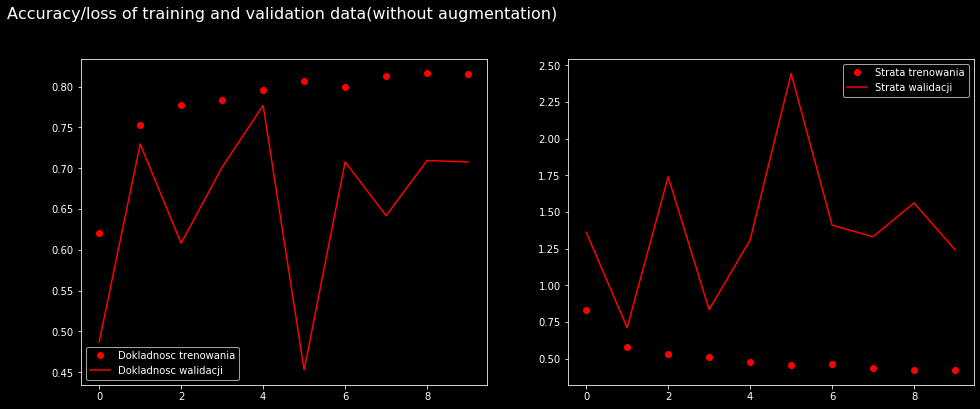

In [64]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(16,6))
plt.style.use('dark_background')

plt.subplot(121)
plt.style.use('dark_background')
plt.plot(epochs, acc, 'ro', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'r', label='Dokladnosc walidacji')
plt.legend()

plt.subplot(122)
plt.style.use('dark_background')
plt.plot(epochs, loss, 'ro', label='Strata trenowania')
plt.plot(epochs, val_loss, 'r', label='Strata walidacji')
plt.legend()

plt.suptitle(t = 'Accuracy/loss of training and validation data(without augmentation)', 
             x = 0.3, 
             y = 1, 
             fontsize = 16)
plt.show()

Text(0.3, 1, 'Best models accuracy comparison (no augmentation)')

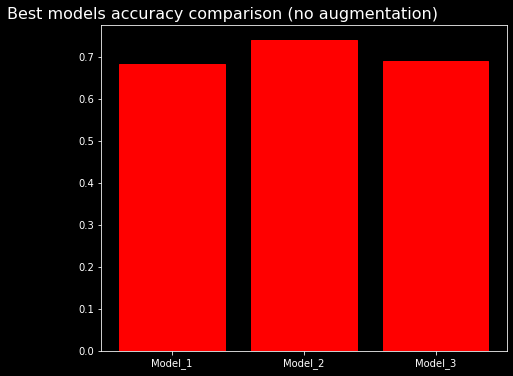

In [46]:
plt.figure(figsize=(16,6))

plt.subplot(121)
bars = ('Model_1', 'Model_2', 'Model_3')
height = [test_accuracy_1, test_accuracy_2, test_accuracy_3]
plt.bar(np.arange(len(bars)), height, color='r', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Best models accuracy comparison (no augmentation)', x = 0.3, y = 1,fontsize = 16)

In [50]:
best_model = load_model('model.05-0.78.hdf5')

test_loss_best, test_accuracy_best = best_model.evaluate(test_generator, steps=50)

print('Test loss of best model: %4.2f' % (test_loss_best))
print('Test accuracy of best model: %4.2f' % (test_accuracy_best))

50/50 [==============================] - 24s 475ms/step
Test loss of best model: 0.63
Test accuracy of best model: 0.74


EXAMPLE OF AUGMENTED IMAGE 

In [24]:
datagen = ImageDataGenerator(rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

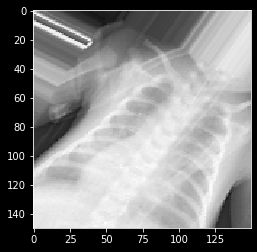

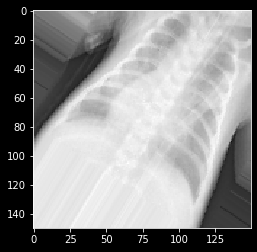

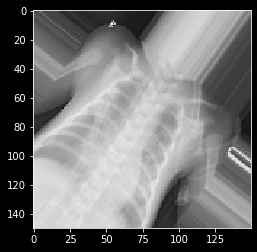

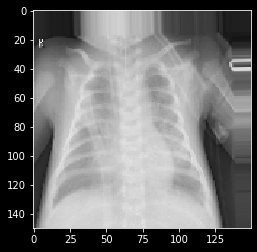

In [25]:
fnames = [os.path.join(train_bacteria_dir, fname) for fname in os.listdir(train_bacteria_dir)]
img_path = fnames[2]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [26]:
datagen_2 = ImageDataGenerator(brightness_range = (0.1, 1.6),
                               zca_whitening = False,
                               samplewise_std_normalization=False)

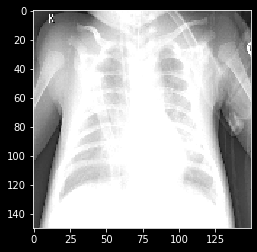

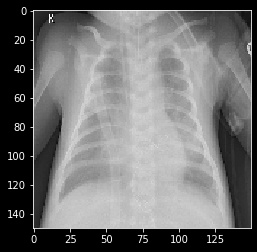

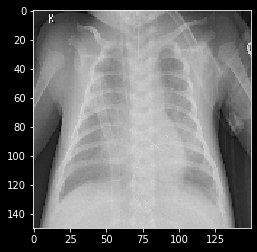

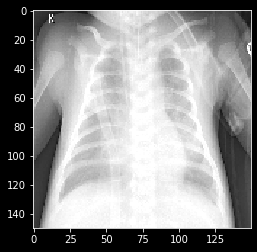

In [303]:
fnames = [os.path.join(train_bacteria_dir, fname) for fname in os.listdir(train_bacteria_dir)]
img_path = fnames[2]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen_2.flow(x, batch_size = 1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

DATA PREPROCESSING WITH AUGMENTATION

In [27]:
train_datagen_aug_geo = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

test_datagen_aug_geo = ImageDataGenerator(rescale = 1./255)

train_generator_aug_geo = train_datagen_aug_geo.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

validation_generator_aug_geo = test_datagen_aug_geo.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

Found 5216 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


SETTING UP CALLBACKS 

In [305]:
mc = ModelCheckpoint('model_aug_geo.{epoch:02d}-{val_acc:.2f}.hdf5', 
                     monitor='val_acc',
                     mode='max', 
                     save_best_only=False,
                     verbose=1)
cb_list_aug_geo = [mc]

MODEL FITTING WTIH AUGMENTATION APPLIED

In [306]:
history_aug_geo = model.fit_generator(
train_generator_aug_geo,
steps_per_epoch=160,
epochs=10,
validation_data=validation_generator_aug_geo,
validation_steps=5,
shuffle=True,
callbacks=cb_list_aug_geo)

Epoch 1/10
160/160 [==============================] - 187s 1s/step - loss: 0.9064 - acc: 0.5844 - val_loss: 0.7681 - val_acc: 0.7468

Epoch 00001: saving model to model_aug_geo.01-0.75.hdf5
Epoch 2/10
160/160 [==============================] - 172s 1s/step - loss: 0.7960 - acc: 0.6439 - val_loss: 0.5852 - val_acc: 0.8176

Epoch 00002: saving model to model_aug_geo.02-0.82.hdf5
Epoch 3/10
160/160 [==============================] - 170s 1s/step - loss: 0.7463 - acc: 0.6742 - val_loss: 0.4273 - val_acc: 0.8041

Epoch 00003: saving model to model_aug_geo.03-0.80.hdf5
Epoch 4/10
160/160 [==============================] - 170s 1s/step - loss: 0.7437 - acc: 0.6697 - val_loss: 0.5753 - val_acc: 0.7273

Epoch 00004: saving model to model_aug_geo.04-0.73.hdf5
Epoch 5/10
160/160 [==============================] - 181s 1s/step - loss: 0.7138 - acc: 0.6949 - val_loss: 0.9613 - val_acc: 0.5608

Epoch 00005: saving model to model_aug_geo.05-0.56.hdf5
Epoch 6/10
160/160 [==============================

SAVING AND EVALUATING ONLY BEST MODEL

In [35]:
saved_model_aug_geo_1 = load_model('model_aug_geo.02-0.82.hdf5')
saved_model_aug_geo_2 = load_model('model_aug_geo.08-0.83.hdf5')
saved_model_aug_geo_3 = load_model('model_aug_geo.10-0.86.hdf5')

In [36]:
test_loss_aug_geo_1, test_accuracy_aug_geo_1 = saved_model_aug_geo_1.evaluate(test_generator, steps=50)
test_loss_aug_geo_2, test_accuracy_aug_geo_2 = saved_model_aug_geo_2.evaluate(test_generator, steps=50)
test_loss_aug_geo_3, test_accuracy_aug_geo_3 = saved_model_aug_geo_3.evaluate(test_generator, steps=50)

50/50 [==============================] - 23s 469ms/step


In [37]:
print('Test loss model 1: %4.2f' % (test_loss_aug_geo_1))
print('Test accuracy model 1: %4.2f' % (test_accuracy_aug_geo_1))
print('Test loss model 2: %4.2f' % (test_loss_aug_geo_2))
print('Test accuracy model 2: %4.2f' % (test_accuracy_aug_geo_2))
print('Test loss model 3: %4.2f' % (test_loss_aug_geo_3))
print('Test accuracy model 3: %4.2f' % (test_accuracy_aug_geo_3))

Test loss model 1: 0.70
Test accuracy model 1: 0.77
Test loss model 2: 0.58
Test accuracy model 2: 0.80
Test loss model 3: 0.45
Test accuracy model 3: 0.86


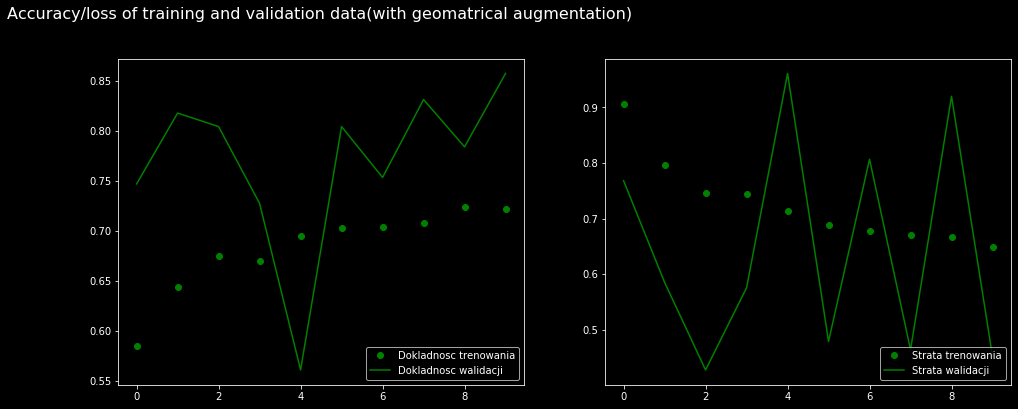

In [307]:
acc = history_aug_geo.history['acc']
val_acc = history_aug_geo.history['val_acc']
loss = history_aug_geo.history['loss']
val_loss = history_aug_geo.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.style.use('dark_background')
plt.plot(epochs, acc, 'go', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'g', label='Dokladnosc walidacji')
plt.legend(loc="lower right")

plt.subplot(122)
plt.style.use('dark_background')
plt.plot(epochs, loss, 'go', label='Strata trenowania')
plt.plot(epochs, val_loss, 'g', label='Strata walidacji')
plt.legend(loc='lower right')

plt.suptitle(t = 'Accuracy/loss of training and validation data(with geomatrical augmentation)', 
             x = 0.3, 
             y = 1, 
             fontsize = 16)
plt.show()

Text(0.3, 1, 'Best models accuracy comparison (geometrical augmentation)')

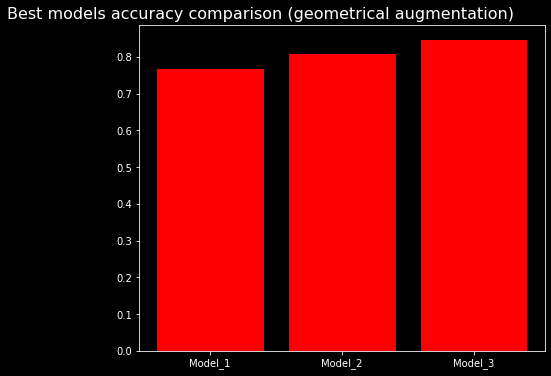

In [83]:
plt.figure(figsize=(16,6))

plt.subplot(121)
bars = ('Model_1', 'Model_2', 'Model_3')
height = [test_accuracy_aug_geo_1, test_accuracy_aug_geo_2, test_accuracy_aug_geo_3]
plt.bar(np.arange(len(bars)), height, color='r', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Best models accuracy comparison (geometrical augmentation)', x = 0.3, y = 1,fontsize = 16)

In [38]:
best_model_aug_geo = load_model('model_aug_geo.10-0.86.hdf5')

test_loss_best_aug_geo, test_accuracy_best_aug_geo = best_model_aug_geo.evaluate(test_generator, steps=50)

print('Test loss of best model: %4.2f' % (test_loss_best_aug_geo))
print('Test accuracy of best model: %4.2f' % (test_accuracy_best_aug_geo))

50/50 [==============================] - 24s 471ms/step
Test loss of best model: 0.43
Test accuracy of best model: 0.85


In [28]:
train_datagen_aug_color = ImageDataGenerator(rescale = 1./255, 
                                             brightness_range = (0.1, 1.6))

test_datagen_aug_color = ImageDataGenerator(rescale = 1./255)

train_generator_aug_color = train_datagen_aug_color.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

validation_generator_aug_color = test_datagen_aug_color.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

Found 5216 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [326]:
mc = ModelCheckpoint('model_aug_color.{epoch:02d}-{val_acc:.2f}.hdf5', 
                     monitor='val_acc',
                     mode='max', 
                     save_best_only=False,
                     verbose=1)
cb_list_aug_color = [mc]

In [327]:
history_aug_color = model.fit_generator(
train_generator_aug_color,
steps_per_epoch=160,
epochs=10,
validation_data=validation_generator_aug_color,
validation_steps=5,
shuffle=True,
callbacks=cb_list_aug_color)

Epoch 1/10
160/160 [==============================] - 212s 1s/step - loss: 0.3350 - acc: 0.8713 - val_loss: 4.7694 - val_acc: 0.6169

Epoch 00001: saving model to model_aug_color.01-0.62.hdf5
Epoch 2/10
160/160 [==============================] - 197s 1s/step - loss: 0.3578 - acc: 0.8672 - val_loss: 8.0982 - val_acc: 0.6622

Epoch 00002: saving model to model_aug_color.02-0.66.hdf5
Epoch 3/10
160/160 [==============================] - 199s 1s/step - loss: 0.3336 - acc: 0.8654 - val_loss: 0.7541 - val_acc: 0.6216

Epoch 00003: saving model to model_aug_color.03-0.62.hdf5
Epoch 4/10
160/160 [==============================] - 183s 1s/step - loss: 0.3374 - acc: 0.8730 - val_loss: 3.3094 - val_acc: 0.7727

Epoch 00004: saving model to model_aug_color.04-0.77.hdf5
Epoch 5/10
160/160 [==============================] - 162s 1s/step - loss: 0.3454 - acc: 0.8633 - val_loss: 1.2119 - val_acc: 0.7432

Epoch 00005: saving model to model_aug_color.05-0.74.hdf5
Epoch 6/10
160/160 [====================

In [39]:
saved_model_aug_color_1 = load_model('model_aug_color.04-0.77.hdf5')
saved_model_aug_color_2 = load_model('model_aug_color.05-0.74.hdf5')
saved_model_aug_color_3 = load_model('model_aug_color.08-0.74.hdf5')

In [40]:
test_loss_aug_color_1, test_accuracy_aug_color_1 = saved_model_aug_color_1.evaluate(test_generator, steps=50)
test_loss_aug_color_2, test_accuracy_aug_color_2 = saved_model_aug_color_2.evaluate(test_generator, steps=50)
test_loss_aug_color_3, test_accuracy_aug_color_3 = saved_model_aug_color_3.evaluate(test_generator, steps=50)

50/50 [==============================] - 23s 468ms/step


In [41]:
print('Test loss model 1: %4.2f' % (test_loss_aug_color_1))
print('Test accuracy model 1: %4.2f' % (test_accuracy_aug_color_1))
print('Test loss model 2: %4.2f' % (test_loss_aug_color_2))
print('Test accuracy model 2: %4.2f' % (test_accuracy_aug_color_2))
print('Test loss model 3: %4.2f' % (test_loss_aug_color_3))
print('Test accuracy model 3: %4.2f' % (test_accuracy_aug_color_3))

Test loss model 1: 2.21
Test accuracy model 1: 0.69
Test loss model 2: 2.85
Test accuracy model 2: 0.69
Test loss model 3: 2.35
Test accuracy model 3: 0.68


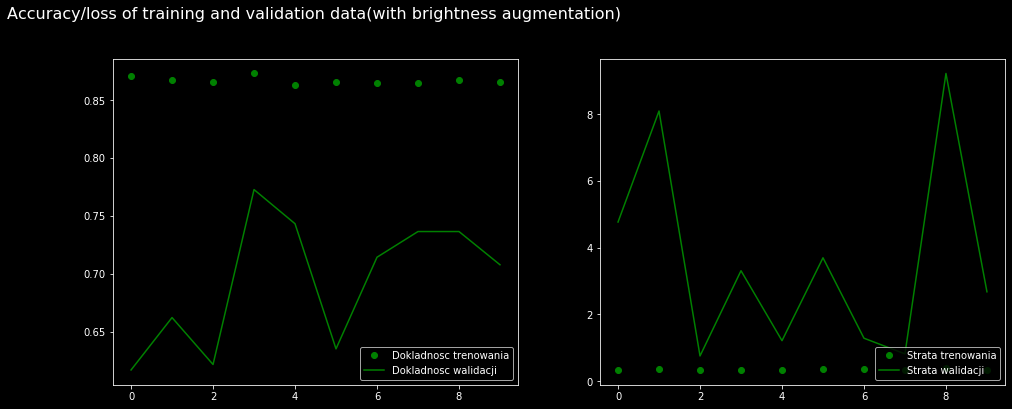

In [335]:
acc = history_aug_color.history['acc']
val_acc = history_aug_color.history['val_acc']
loss = history_aug_color.history['loss']
val_loss = history_aug_color.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.style.use('dark_background')
plt.plot(epochs, acc, 'go', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'g', label='Dokladnosc walidacji')
plt.legend(loc="lower right")

plt.subplot(122)
plt.style.use('dark_background')
plt.plot(epochs, loss, 'go', label='Strata trenowania')
plt.plot(epochs, val_loss, 'g', label='Strata walidacji')
plt.legend(loc='lower right')

plt.suptitle(t = 'Accuracy/loss of training and validation data(with brightness augmentation)', 
             x = 0.3, 
             y = 1, 
             fontsize = 16)
plt.show()

Text(0.3, 1, 'Best models accuracy comparison (brightness augmentation)')

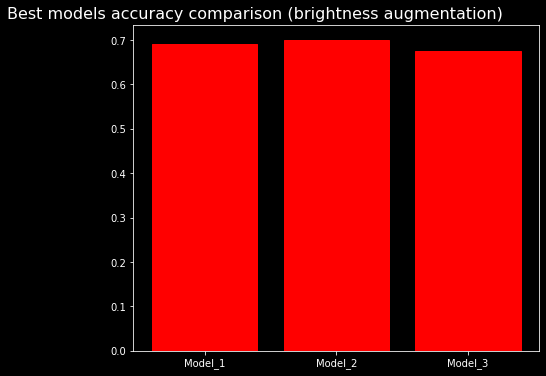

In [104]:
plt.figure(figsize=(16,6))

plt.subplot(121)
bars = ('Model_1', 'Model_2', 'Model_3')
height = [test_accuracy_aug_color_1, test_accuracy_aug_color_2, test_accuracy_aug_color_3]
plt.bar(np.arange(len(bars)), height, color='r', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Best models accuracy comparison (brightness augmentation)', x = 0.3, y = 1,fontsize = 16)

In [62]:
best_model_aug_color = load_model('model_aug_color.05-0.74.hdf5')

test_loss_best_aug_color, test_accuracy_best_aug_color = best_model_aug_color.evaluate(test_generator, 
                                                                                       steps=50)

print('Test loss of best model: %4.2f' % (test_loss_best_aug_color))
print('Test accuracy of best model: %4.2f' % (test_accuracy_best_aug_color))

50/50 [==============================] - 28s 551ms/step
Test loss of best model: 1.81
Test accuracy of best model: 0.70


In [29]:
train_datagen_aug_complete = ImageDataGenerator(rescale = 1./255,
                                                rotation_range=40,
                                                width_shift_range=0.2, 
                                                height_shift_range=0.2, 
                                                shear_range=0.2, 
                                                zoom_range=0.2, 
                                                horizontal_flip=True,
                                                brightness_range = (0.2, 1.6))

test_datagen_aug_complete = ImageDataGenerator(rescale = 1./255)

train_generator_aug_complete = train_datagen_aug_complete.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

validation_generator_aug_complete = test_datagen_aug_complete.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=32,
class_mode='categorical')

Found 5216 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [43]:
mc = ModelCheckpoint('model_aug_complete.{epoch:02d}-{val_acc:.2f}.hdf5', 
                     monitor='val_acc',
                     mode='max', 
                     save_best_only=False,
                     verbose=1)
cb_list_aug_complete = [mc]

In [67]:
history_aug_complete = model.fit_generator(
train_generator_aug_complete,
steps_per_epoch=160,
epochs=10,
validation_data=validation_generator_aug_complete,
validation_steps=5,
shuffle=True,
callbacks = cb_list_aug_complete)

Epoch 1/10
160/160 [==============================] - 201s 1s/step - loss: 0.7426 - acc: 0.6803 - val_loss: 0.8554 - val_acc: 0.6039

Epoch 00001: saving model to model_aug_complete.01-0.60.hdf5
Epoch 2/10
160/160 [==============================] - 185s 1s/step - loss: 0.7281 - acc: 0.6848 - val_loss: 0.7024 - val_acc: 0.7162

Epoch 00002: saving model to model_aug_complete.02-0.72.hdf5
Epoch 3/10
160/160 [==============================] - 202s 1s/step - loss: 0.7169 - acc: 0.6895 - val_loss: 0.8689 - val_acc: 0.5946

Epoch 00003: saving model to model_aug_complete.03-0.59.hdf5
Epoch 4/10
160/160 [==============================] - 205s 1s/step - loss: 0.7176 - acc: 0.6885 - val_loss: 0.7950 - val_acc: 0.6234

Epoch 00004: saving model to model_aug_complete.04-0.62.hdf5
Epoch 5/10
160/160 [==============================] - 174s 1s/step - loss: 0.7011 - acc: 0.6992 - val_loss: 0.7975 - val_acc: 0.5946

Epoch 00005: saving model to model_aug_complete.05-0.59.hdf5
Epoch 6/10
160/160 [=====

In [70]:
saved_model_aug_complete_1 = load_model('model_aug_complete.02-0.72.hdf5')
saved_model_aug_complete_2 = load_model('model_aug_complete.08-0.80.hdf5')
saved_model_aug_complete_3 = load_model('model_aug_complete.10-0.80.hdf5')

In [71]:
test_loss_aug_complete_1, test_accuracy_aug_complete_1 = saved_model_aug_complete_1.evaluate(test_generator, steps=50)
test_loss_aug_complete_2, test_accuracy_aug_complete_2 = saved_model_aug_complete_2.evaluate(test_generator, steps=50)
test_loss_aug_complete_3, test_accuracy_aug_complete_3 = saved_model_aug_complete_3.evaluate(test_generator, steps=50)

50/50 [==============================] - 28s 550ms/step


In [73]:
print('Test loss model 1: %4.2f' % (test_loss_aug_complete_1))
print('Test accuracy model 1: %4.2f' % (test_accuracy_aug_complete_1))
print('Test loss model 2: %4.2f' % (test_loss_aug_complete_2))
print('Test accuracy model 2: %4.2f' % (test_accuracy_aug_complete_2))
print('Test loss model 3: %4.2f' % (test_loss_aug_complete_3))
print('Test accuracy model 3: %4.2f' % (test_accuracy_aug_complete_3))

Test loss model 1: 0.77
Test accuracy model 1: 0.74
Test loss model 2: 0.64
Test accuracy model 2: 0.77
Test loss model 3: 0.65
Test accuracy model 3: 0.79


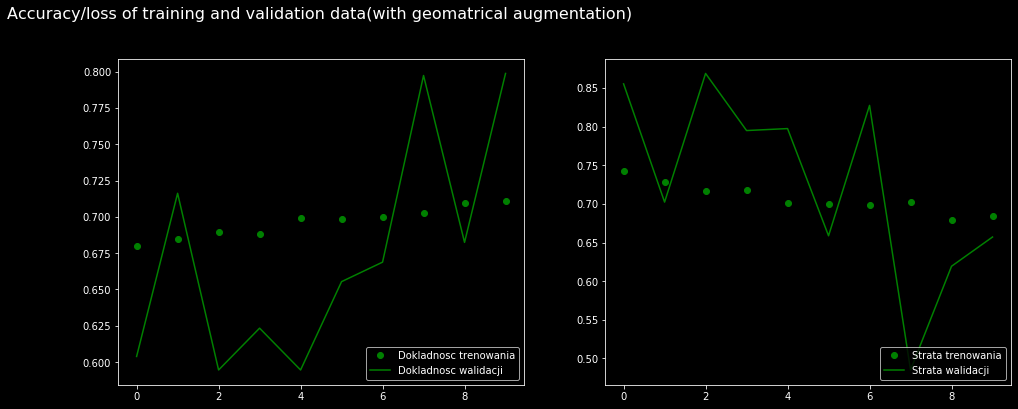

In [74]:
acc = history_aug_complete.history['acc']
val_acc = history_aug_complete.history['val_acc']
loss = history_aug_complete.history['loss']
val_loss = history_aug_complete.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.style.use('dark_background')
plt.plot(epochs, acc, 'go', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'g', label='Dokladnosc walidacji')
plt.legend(loc="lower right")

plt.subplot(122)
plt.style.use('dark_background')
plt.plot(epochs, loss, 'go', label='Strata trenowania')
plt.plot(epochs, val_loss, 'g', label='Strata walidacji')
plt.legend(loc='lower right')

plt.suptitle(t = 'Accuracy/loss of training and validation data(with geomatrical augmentation)', 
             x = 0.3, 
             y = 1, 
             fontsize = 16)
plt.show()

Text(0.3, 1, 'Best models accuracy comparison (full augmentation)')

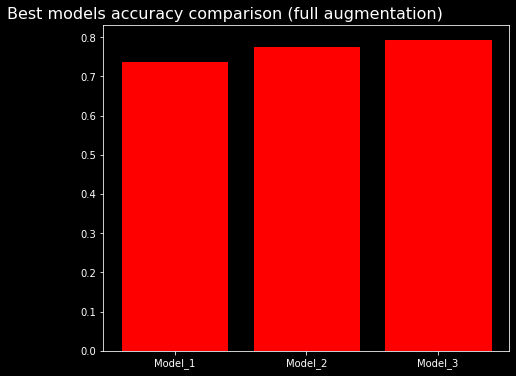

In [75]:
plt.figure(figsize=(16,6))

plt.subplot(121)
bars = ('Model_1', 'Model_2', 'Model_3')
height = [test_accuracy_aug_complete_1, test_accuracy_aug_complete_2, test_accuracy_aug_complete_3]
plt.bar(np.arange(len(bars)), height, color='r', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Best models accuracy comparison (full augmentation)', x = 0.3, y = 1,fontsize = 16)

In [76]:
best_model_aug_complete = load_model('model_aug_complete.10-0.80.hdf5')

test_loss_best_aug_complete, test_accuracy_best_aug_complete = best_model_aug_complete.evaluate(test_generator, 
                                                                                       steps=50)

print('Test loss of best model: %4.2f' % (test_loss_best_aug_complete))
print('Test accuracy of best model: %4.2f' % (test_accuracy_best_aug_complete))

50/50 [==============================] - 26s 516ms/step
Test loss of best model: 0.60
Test accuracy of best model: 0.80


COMPARISON OF MODELS WITH AND WITHOUT DATA AUGMENTATION APPLIED

In [77]:
print('Test loss: %4.2f' % (test_loss_best))
print('Test loss (Geometrical augmentation): %4.2f' % (test_loss_best_aug_geo))
print('Test loss (Brightness augmentation): %4.2f' % (test_loss_best_aug_color))
print('Test loss (Full augmentation): %4.2f' % (test_loss_best_aug_complete))

Test loss: 0.63
Test loss (Geometrical augmentation): 0.43
Test loss (Brightness augmentation): 1.81
Test loss (Full augmentation): 0.60


In [80]:
print('Test accuracy: %4.2f' % (test_accuracy_best))
print('Test accuracy (Geometrical augmentation): %4.2f' % (test_accuracy_best_aug_geo))
print('Test accuracy (Brightness augmentation): %4.2f' % (test_accuracy_best_aug_color))
print('Test accuracy (Full augmentation): %4.2f' % (test_accuracy_best_aug_complete))

Test accuracy: 0.74
Test accuracy (Geometrical augmentation): 0.85
Test accuracy (Brightness augmentation): 0.70
Test accuracy (Full augmentation): 0.80


Text(0.3, 1, 'Loss comparison (less is better)')

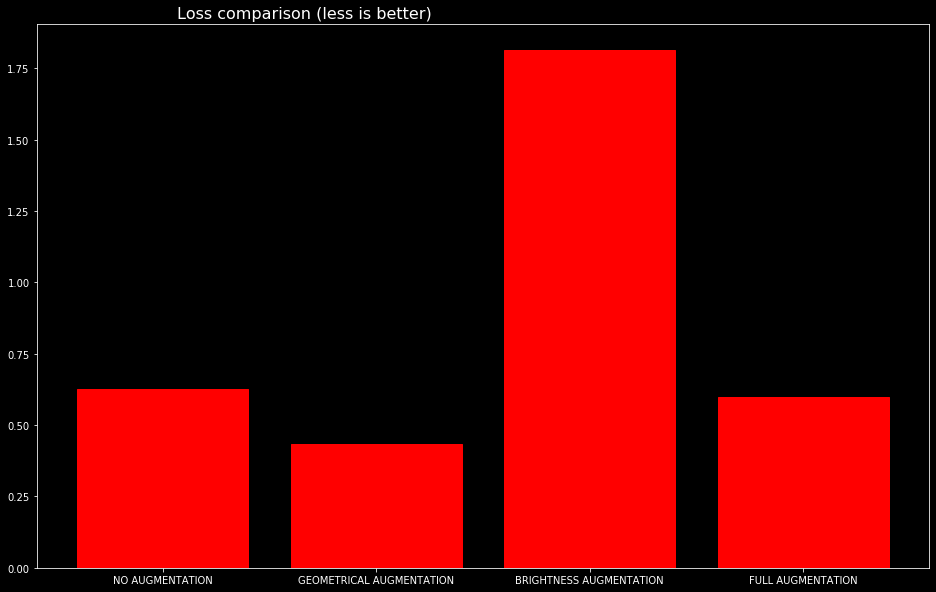

In [81]:
plt.figure(figsize=(16, 10))
bars = ('NO AUGMENTATION', 'GEOMETRICAL AUGMENTATION', 'BRIGHTNESS AUGMENTATION', 'FULL AUGMENTATION')
height = [test_loss_best, test_loss_best_aug_geo, test_loss_best_aug_color, test_loss_best_aug_complete]
plt.bar(np.arange(len(bars)), height, color='r', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Loss comparison (less is better)', x = 0.3, y = 1,fontsize = 16)


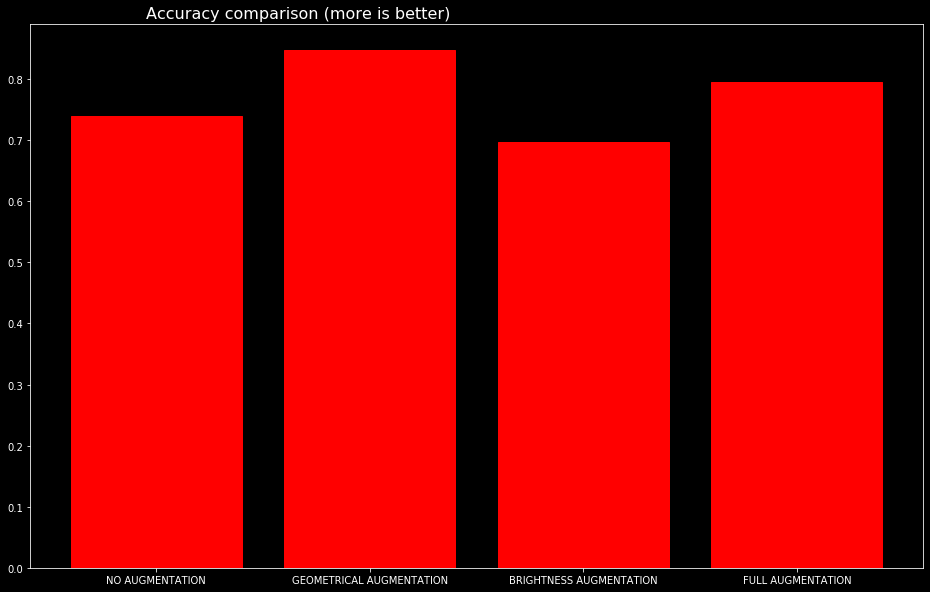

In [82]:
plt.figure(figsize=(16,10))
bars = ('NO AUGMENTATION', 'GEOMETRICAL AUGMENTATION', 'BRIGHTNESS AUGMENTATION', 'FULL AUGMENTATION')
height = [test_accuracy_best, test_accuracy_best_aug_geo, test_accuracy_best_aug_color, test_accuracy_best_aug_complete]
plt.bar(np.arange(len(bars)), height, color='r', edgecolor='r')
plt.xticks(np.arange(len(bars)), bars)
plt.title('Accuracy comparison (more is better)', x = 0.3, y = 1,fontsize = 16)
plt.show()

In [84]:
test_datagen_final = ImageDataGenerator(rescale = 1./255)

test_generator_final = test_datagen_final.flow_from_directory(
test_dir,
target_size=(150,150),
batch_size=550,
class_mode='categorical',
shuffle=False)

Found 550 images belonging to 3 classes.


In [85]:
Y_pred_1 = best_model.predict(test_generator_final, steps=1)
Y_pred_2 = best_model_aug_geo.predict(test_generator_final, steps=1)
Y_pred_3 = best_model_aug_color.predict(test_generator_final, steps=1)
Y_pred_4 = best_model_aug_complete.predict(test_generator_final, steps=1)

y_labels = test_generator.classes

In [91]:
y_pred_1 = np.argmax(Y_pred_1, axis=1)
print('Best model without augmentation')
print(confusion_matrix(test_generator.classes, y_pred_1))
print('Classification Report')
target_names = ['Healthy', 'Backteria', 'Virus']
print(classification_report(test_generator.classes, y_pred_1, target_names=target_names))
print('\n')

y_pred_2 = np.argmax(Y_pred_2, axis=1)
print('Best model with geometrical augmentation')
print(confusion_matrix(test_generator.classes, y_pred_2))
print('Classification Report')
target_names = ['Healthy', 'Backteria', 'Virus']
print(classification_report(test_generator.classes, y_pred_2, target_names=target_names))
print('\n')

y_pred_3 = np.argmax(Y_pred_3, axis=1)
print('Best model with brightness augmentation')
print(confusion_matrix(test_generator.classes, y_pred_3))
print('Classification Report')
target_names = ['Healthy', 'Backteria', 'Virus']
print(classification_report(test_generator.classes, y_pred_3, target_names=target_names))
print('\n')

y_pred_4 = np.argmax(Y_pred_4, axis=1)
print('Best model with full augmentation')
print(confusion_matrix(test_generator.classes, y_pred_4))
print('Classification Report')
target_names = ['Healthy', 'Backteria', 'Virus']
print(classification_report(test_generator.classes, y_pred_4, target_names=target_names))


Best model without augmentation
[[209   5   6]
 [ 62 115  35]
 [ 32   2  84]]
Classification Report
              precision    recall  f1-score   support

     Healthy       0.69      0.95      0.80       220
   Backteria       0.94      0.54      0.69       212
       Virus       0.67      0.71      0.69       118

    accuracy                           0.74       550
   macro avg       0.77      0.73      0.73       550
weighted avg       0.78      0.74      0.73       550



Best model with geometrical augmentation
[[205   9   6]
 [ 12 183  17]
 [ 33   7  78]]
Classification Report
              precision    recall  f1-score   support

     Healthy       0.82      0.93      0.87       220
   Backteria       0.92      0.86      0.89       212
       Virus       0.77      0.66      0.71       118

    accuracy                           0.85       550
   macro avg       0.84      0.82      0.83       550
weighted avg       0.85      0.85      0.85       550



Best model with brightnes

In [87]:
best_models_dict = {'best_model' : best_model, 
               'best_model_aug_geo' : best_model_aug_geo, 
               'best_model_aug_color' : best_model_aug_color,
               'best_model_aug_complete' : best_model_aug_complete}

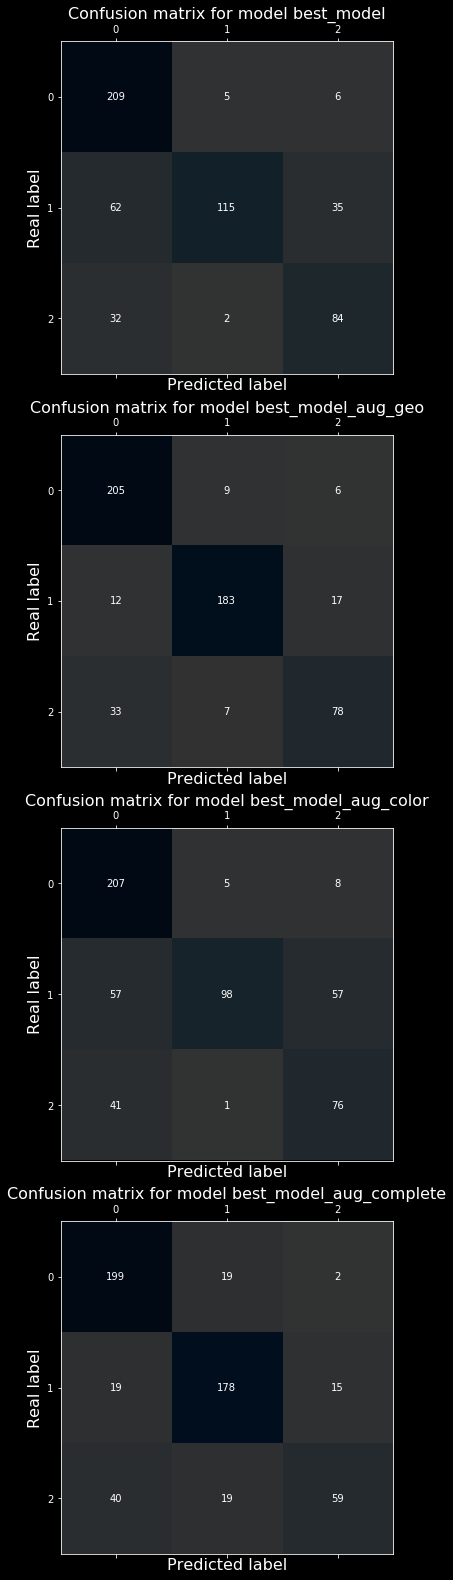

In [96]:
fig, axs = plt.subplots(4, 1, figsize = (22,22))
for ax, (key, value) in zip(axs, best_models_dict.items()):
    
    Y_pred = value.predict(test_generator_final, steps = 1)
    y_pred = np.argmax(Y_pred, axis=1)
    confmat = confusion_matrix(y_true = y_labels, y_pred = y_pred)
    ax.matshow(confmat, cmap = plt.cm.Blues, alpha =0.2)
    
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y = i, s = confmat[i, j], va = 'center', ha = 'center')
            
    ax.set_xlabel('Predicted label', fontsize= 16, x=0.5, y=-1)
    ax.set_ylabel('Real label', fontsize=16, x = 1, y=0.5)
    ax.set_title('Confusion matrix for model ' + key, fontsize = 16)
    
    
plt.tight_layout()
plt.show()